<a href="https://colab.research.google.com/github/pradiptars/Ml_Kaggle_podcasttime/blob/main/predict_podcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [5]:
df = pd.concat([train, test])

In [6]:
df.head(2)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241


In [7]:
df.select_dtypes(include='object').columns

Index(['Podcast_Name', 'Episode_Title', 'Genre', 'Publication_Day',
       'Publication_Time', 'Episode_Sentiment'],
      dtype='object')

# convert catagorical to numaric

In [8]:
df['Genre'].value_counts()

,count
Genre,
Sports,116509
Technology,114653
True Crime,113440
Lifestyle,110140
Comedy,108749
Business,107211
Health,95342
News,84635
Music,83797


In [9]:
order_label = {'Business': 1, 'Comedy' :2 , 'Education': 3, 'Health' : 4, 'Lifestyle' : 5, 'Music' : 6, 'News' : 7, 'Sports' : 8, 'Travel' : 9}
df['Genre'] = df['Genre'].map(order_label)

In [10]:
df['Publication_Time'].value_counts()

,count
Publication_Time,
Night,262289
Evening,261025
Afternoon,239225
Morning,237461


In [11]:
order_label = {'Morning': 1, 'Evening' :2 , 'Night': 3}
df['Publication_Time'] = df['Publication_Time'].map(order_label)

In [12]:
df['Episode_Sentiment'].value_counts()

,count
Episode_Sentiment,
Neutral,334962
Negative,333626
Positive,331412


In [13]:
order_label = {'Positive': 1, 'Neutral' :2 , 'Negative': 3}
df['Episode_Sentiment'] = df['Episode_Sentiment'].map(order_label)

In [14]:
df['Publication_Day'].value_counts()

,count
Publication_Day,
Sunday,154852
Monday,149307
Friday,144081
Wednesday,143610
Thursday,139158
Saturday,138112
Tuesday,130880


In [15]:
order_label = {'Monday': 1, 'Tuesday' :2 , 'Wednesday': 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6, 'Sunday' : 7}
df['Publication_Day'] = df['Publication_Day'].map(order_label)

# conVert Episode title

In [16]:
import re

def remove_strings(df, Episode_Title):
  df['Episode_Title'] = df['Episode_Title'].astype(str).apply(lambda x: ''.join(re.findall(r'\d+', x)))
  df['Episode_Title'] = df['Episode_Title'].replace('', pd.NA)  # Replace empty strings with NaN
  df['Episode_Title'] = df['Episode_Title'].astype(int)
  return df

In [17]:
df = remove_strings(df, 'Episode_Title')

In [18]:
df.head(2)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,98,NaN,NaN,74.81,4,3.0,NaN,0.0,1,31.41998
1,1,Joke Junction,26,119.8,2.0,66.95,6,NaN,75.95,2.0,3,88.01241


# Filling Missing Value

In [19]:
df.isnull().sum()

,0
id,0
Podcast_Name,0
Episode_Title,0
Episode_Length_minutes,115829
Genre,228093
Host_Popularity_percentage,0
Publication_Day,0
Publication_Time,239225
Guest_Popularity_percentage,194862
Number_of_Ads,1


<Axes: >

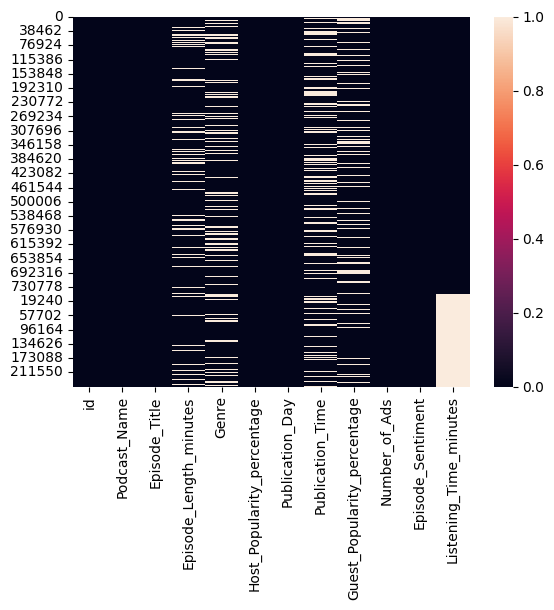

In [20]:
sns.heatmap(df.isnull())

In [21]:
df['Genre'] = df['Genre'].fillna(df['Genre'].mode()[0])
df['Episode_Length_minutes'] = df['Episode_Length_minutes'].fillna(df['Episode_Title'].mode()[0])
df['Publication_Time'] = df['Publication_Time'].fillna(df['Publication_Time'].mode()[0])
df['Guest_Popularity_percentage'] = df['Guest_Popularity_percentage'].fillna(df['Guest_Popularity_percentage'].mode()[0])
df['Listening_Time_minutes'] = df['Listening_Time_minutes'].fillna(df['Listening_Time_minutes'].mode()[0])

In [22]:
df.head(2)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,98,71.0,8.0,74.81,4,3.0,68.53,0.0,1,31.41998
1,1,Joke Junction,26,119.8,2.0,66.95,6,3.0,75.95,2.0,3,88.01241


In [23]:
df1 = df.drop(['Podcast_Name'], axis=1)

In [24]:
df1.head(2)

,id,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,98,71.0,8.0,74.81,4,3.0,68.53,0.0,1,31.41998
1,1,26,119.8,2.0,66.95,6,3.0,75.95,2.0,3,88.01241


<Axes: >

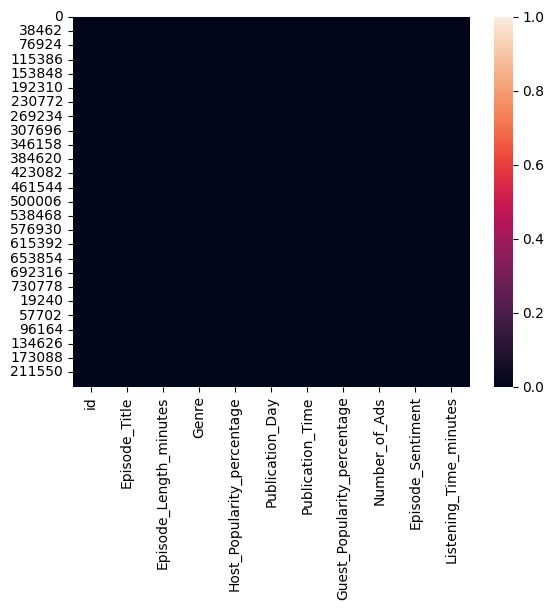

In [25]:
sns.heatmap(df1.isnull())

# Scale and train data

In [26]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(df1)
df1 = scaler.transform(df1)

In [27]:
train_len = train.shape[0]
X_train = df1[:train_len]
X_test = df1[train_len:]
y_train = train['Listening_Time_minutes']

In [28]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(750000, 11)
(250000, 11)
(750000,)


In [29]:
y_train

,Listening_Time_minutes
0,31.41998
1,88.01241
2,44.92531
3,46.27824
4,75.61031
...,...
749995,56.87058
749996,45.46242
749997,15.26000
749998,100.72939


# Cross Validation

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

# User define function for all score

In [31]:
def test_model(model, X_train, y_train):
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=cv, scoring=r2)
    score = [r2_val_score.mean()]
    return score

# Decetion Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
test_model(dt, X_train, y_train)

[np.float64(0.9999999999931578)]

# submission file

In [33]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
!pip install matplotlib-venn

In [36]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [37]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 126333 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1.3_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1.3) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=cc3ab0cc1459245b9fd41b5924b94b6b39d68583dbd938c6e006fcf6faf0d87b
  Stored in directory: /root/.cache/pip/wheels/32/98/bd/4893d6923dd027f455b250367d402bfd69a6f4416581df46db
Successfully built libarchive


In [38]:
!pip install cartopy
import cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 73.7 MB/s eta 0:00:00


In [39]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

In [40]:
y_pred = np.exp(dt.predict(X_test))

In [41]:
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [42]:
submit_test = pd.concat([test['id'], pd.DataFrame(y_pred, columns=['Listening_Time_minutes'])], axis=1)
submit_test.head()

,id,Listening_Time_minutes
0,750000,1.0
1,750001,1.0
2,750002,1.0
3,750003,1.0
4,750004,1.0


In [43]:
submit_test.to_csv('podcast_submission.csv', index=False)